## Import Packages and Load Data

In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd

In [2]:
iris = load_iris()
iris.data.shape

(150, 4)

In [3]:
X = iris['data']
y = iris['target']

## Train Test Split (70/30)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Define grid search parameters and run GridSearch with Cross-Validation

In [5]:
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100],
             'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]
             }

In [6]:
grid_search = GridSearchCV(SVC(), param_grid, return_train_score=True, n_jobs=-1, verbose=2)

In [7]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    3.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=2)

## Test Score with best Model

In [8]:
print('Best Test Score: {:.2f}'.format(grid_search.score(X_test, y_test)))

Best Test Score: 0.98


## Show best Parameters and best Cross-Validation Score

In [9]:
print('Best Parameters: {}'.format(grid_search.best_params_))
print('Best Cross-Validation Score: {:.2f}'.format(grid_search.best_score_))

Best Parameters: {'C': 1, 'gamma': 0.1}
Best Cross-Validation Score: 0.96


## Plot a Heatmap of Scores

In [29]:
df = pd.DataFrame(grid_search.cv_results_)

In [30]:
df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_gamma', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [31]:
df = df[['param_C', 'param_gamma', 'mean_test_score', 'mean_train_score']]

1) mean_test_scores

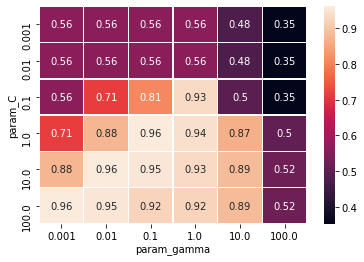

In [32]:
hm = pd.pivot_table(df, values='mean_test_score', index='param_C', columns='param_gamma')
sns.heatmap(hm, annot=True, linewidths=.5);

2) mean_train_scores

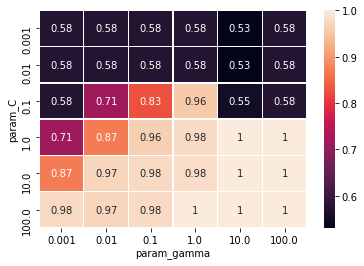

In [33]:
hm = pd.pivot_table(df, values='mean_train_score', index='param_C', columns='param_gamma')
sns.heatmap(hm, annot=True, linewidths=.5);

In [34]:
hm

param_gamma,0.001,0.010,0.100,1.000,10.000,100.000
param_C,,,,,,
0.001,0.576190,0.576190,0.576190,0.576190,0.530952,0.57619
0.010,0.576190,0.576190,0.576190,0.576190,0.530952,0.57619
0.100,0.576190,0.714286,0.828571,0.959524,0.554762,0.57619
1.000,0.714286,0.871429,0.964286,0.978571,1.000000,1.00000
10.000,0.871429,0.973810,0.976190,0.983333,1.000000,1.00000
100.000,0.976190,0.973810,0.978571,1.000000,1.000000,1.00000


## GridSearchCV including the kernel (different parameter tuning for each kernel)

In [35]:
param_grid = [{'kernel' : ['rbf'],
               'C' : [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]},
             {'kernel' : ['rbf'],
               'C' : [0.001, 0.01, 0.1, 1, 10, 100]  
             }]

In [36]:
grid_search = GridSearchCV(SVC(), param_grid, return_train_score=True, n_jobs=-1, verbose=2)

In [37]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    8.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['rbf']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=2)

In [38]:
print('Best Test Score: {:.2f}'.format(grid_search.score(X_test, y_test)))

Best Test Score: 0.98


In [39]:
print('Best Parameters: {}'.format(grid_search.best_params_))
print('Best Cross-Validation Score: {:.2f}'.format(grid_search.best_score_))

Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best Cross-Validation Score: 0.96
